In [4]:
#Import the libraries needed for Lending CLub Case study
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re as re


# function to find the columns where all values are NaN
def find_column_with_all_NaN (df):
  nan_lst = [x for x in df.columns if len(df.index) == df[x].isnull().sum()]
  return nan_lst
       
#Deletes the given list of columns and modifies the dataframe accordingly
def del_columns_from_dataframe(df, del_lst) : 
  df.drop(del_lst, axis=1, inplace = True)

#Funtion to find the list of columns with more than/equlals to 90%  NaN values 
def find_column_with_90percent_or_more_NaN (df):
  list_90percent = [x for x in df.columns if((df[x].isnull().sum() / len(df.index))*100) >= 90]     
  return list_90percent

def convert_emp_len(emp_len) :
  emp_len = re.findall('(\d+)', emp_len) #emp_len.astype('str').str.extractall('(\d+)')
    
  #emp_len = emp_len.rstrip("+ years")
  #emp_len = emp_len.rstrip(" years")
  #emp_len = emp_len.rstrip(" year")
  #emp_len = emp_len.lstrip("<")
  #emp_len = [int(x) for x in emp_len.split() if x.isdigit()] 
  #print(emp_len)
  return(emp_len)

    
#Read the data set for the case study 
club_case_study_df = pd.read_csv('C:/Users/ANANDHI SUNDAR/Educative_SSDS_course/data/loan.csv', low_memory=False)

#Print shape of dataframe to know number of columns and rows
print("Shape of dataframe : {}".format( club_case_study_df.shape) )

#print(club_case_study_df.head())


#print(club_case_study_df.describe())
#print(club_case_study_df.columns)

#Print number of missing values per column
print("Number of missing values per column : \n", club_case_study_df.isnull().sum(), "\n")

#From analysis missing values many columns have all missing values and find list of columns with NaN values
nan_column_lst = find_column_with_all_NaN(club_case_study_df)

#Drop the columans with all Nan
del_columns_from_dataframe(club_case_study_df, nan_column_lst)
print("Number of columns with all NaN vlaues : {}".format(len(nan_column_lst)))
print("Shape of data frame after dropping columnus with all NaN : {} \n".format(club_case_study_df.shape))

#Find columns with 90% or more of NaN values
list_90 = find_column_with_90percent_or_more_NaN(club_case_study_df)
#Delete columns with 90 0r more percent of NaN values
del_columns_from_dataframe(club_case_study_df, list_90)
print("Number of columns with all 90% or more NaN vlaues : {}".format(len(list_90)))
print("Shape of data frame after dropping columnus with 90% or more NaN : {} \n".format(club_case_study_df.shape))

#Print number of missing values per column after removing columns with more than 90% values missing
print("Number of missing values per column after droping columns : \n", club_case_study_df.isnull().sum(), "\n")

#print desc column to anylsis the data as this column has many missing valyes
print(club_case_study_df["desc"].head(20))
# desc column will not be used for loan decision also just description hence droping 
club_case_study_df.drop('desc', axis =1, inplace=True)

# Column 'mths_since_last_delinq' has more than 64% missing values. 
print("\nPrinting mths_since_last_delinq with non missing values")
print(club_case_study_df[club_case_study_df["mths_since_last_delinq"].isnull() == False]["mths_since_last_delinq"].tail(50) )
# Either we can drop or impute the missing values. 
#Decided to impute with zero for all mising values  

print("Number of missing values per column : \n", club_case_study_df.isnull().sum(), "\n")
print("Employee title , employee lenght \n", club_case_study_df[['emp_title', 'emp_length']].head())
#Drop row with emp__lengh as NaN
club_case_study_df = club_case_study_df[club_case_study_df['emp_length'].isnull() == False]
#Drop rows were emp_tite is NaN as it is different impute title and NaN are less
club_case_study_df = club_case_study_df[club_case_study_df['emp_title'].isnull() == False]
#print("Number of missing values per column : \n", club_case_study_df.isnull().sum(), "\n")

#print "collections_12_mths_ex_med" and "" columns for analysis
print(club_case_study_df[ ['collections_12_mths_ex_med','chargeoff_within_12_mths']  ].tail(50))
club_case_study_df = club_case_study_df[club_case_study_df['collections_12_mths_ex_med'].isnull() == False]
#print("Number of missing values per column : \n", club_case_study_df.isnull().sum(), "\n")

print(club_case_study_df['pub_rec_bankruptcies'][-150 : -100])

#Will impute missing values with zero as many values are zero
club_case_study_df['pub_rec_bankruptcies'].fillna(0, inplace = True)

#Fill mths_since_last_delinq with zero for missing value as many are missing.
club_case_study_df['mths_since_last_delinq'].fillna(0, inplace = True)

#Will drop rowa wherw  "last_pymnt_d" and "revol_util" are NaN as these have negligible in number 
club_case_study_df = club_case_study_df[club_case_study_df['last_pymnt_d'].isnull() == False]
club_case_study_df = club_case_study_df[club_case_study_df['revol_util'].isnull() == False]

print("Number of missing values per column : \n", club_case_study_df.isnull().sum(), "\n")


#Now we handled all missing values. Now will move analyze and correct data tupe of columns
#print(club_case_study_df.info())

# term, int_rate and zip_code should not be object. Let us inspect the values 
print("Term   and int_rate \n", club_case_study_df[['term', 'int_rate', 'zip_code']].head())
club_case_study_df['term'] = club_case_study_df['term'].apply(lambda x : int(x.rstrip(" months")))
club_case_study_df['int_rate'] = club_case_study_df['int_rate'].apply(lambda x : pd.to_numeric(x.rstrip("%")))
club_case_study_df['zip_code'] = club_case_study_df['zip_code'].apply(lambda x : int(x.rstrip("xx")))

# Looks grade, sub_grade, emp_lenght should not be objact, Print to analyze
print("Grade  Sub_grade  and emp_lenght\n", club_case_study_df[['grade', 'sub_grade', 'emp_length']].head())

#club_case_study_df['emp_length'] = club_case_study_df['emp_length'].apply(lambda x : convert_emp_len(x))
club_case_study_df['emp_length'] = club_case_study_df['emp_length'].apply(lambda x : re.findall('(\d+)' , str(x))[0])
club_case_study_df['emp_length'] = club_case_study_df['emp_length'].apply(lambda x : pd.to_numeric(x))

#Remove % from revol_util column
club_case_study_df['revol_util'] = club_case_study_df['revol_util'].apply(lambda x : pd.to_numeric(x.rstrip("%")))
#Print remaining columns which of object type for analysis
print(club_case_study_df[['earliest_cr_line','initial_list_status', 'application_type']].head())

print(club_case_study_df[club_case_study_df['initial_list_status']!='f']['initial_list_status'])

print(club_case_study_df.info())



#By looking at both columns data, both have NaN values in same rows, hence decided to drop 


#Univariate analysis 

#Plot bar plat on loan status , tearm, months , home_owership



#data_dictionary_df = pd.read_excel("C:\\Users\\G50-70\\Downloads\\CaseStudys\\LendingClubCaseStudy\\Data_Dictionary.xlsx")
#data_dictionary = data_dictionary_df.to_dict()
#print(data_dictionary)


Shape of dataframe : (39717, 111)
Number of missing values per column : 
 id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64 

Number of columns with all NaN vlaues : 54
Shape of data frame after dropping columnus with all NaN : (39717, 57) 

Number of columns with all 90% or more NaN vlaues : 2
Shape of data frame after dropping columnus with 90% or more NaN : (39717, 55) 

Number of missing values per column after droping columns : 
 id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term     

Number of missing values per column : 
 id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         9
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0


In [25]:
club_case_study_df['initial_list_status'].value_counts()

f    37049
Name: initial_list_status, dtype: int64

In [59]:
club_case_study_df.shape

(37049, 52)

In [24]:
club_case_study_df['initial_list_status'].isnull().sum()

0

In [30]:
#Dropping the column initial_list_status as all values are same
club_case_study_df = club_case_study_df.drop(['initial_list_status'],axis = 1)

In [53]:
club_case_study_df.shape

(37049, 52)

In [67]:
club_case_study_df['issue_d'].isnull().sum()

0

In [68]:
club_case_study_df['issue_d'].value_counts()

Dec-11    2126
Nov-11    2048
Oct-11    1951
Sep-11    1925
Aug-11    1810
Jul-11    1732
Jun-11    1702
May-11    1575
Apr-11    1463
Mar-11    1339
Jan-11    1299
Feb-11    1186
Dec-10    1174
Jul-10    1064
Nov-10    1064
Oct-10    1046
Sep-10    1031
Aug-10    1030
Jun-10     968
May-10     871
Apr-10     786
Mar-10     679
Feb-10     575
Nov-09     534
Jan-10     515
Dec-09     513
Oct-09     506
Sep-09     437
Aug-09     399
Jul-09     361
Jun-09     341
May-09     307
Apr-09     278
Mar-09     267
Feb-09     253
Jan-09     229
Mar-08     223
Dec-08     214
Nov-08     175
Feb-08     168
Jan-08     163
Apr-08     145
Oct-08      93
Dec-07      80
Jul-08      77
May-08      70
Aug-08      67
Jun-08      61
Oct-07      42
Nov-07      33
Sep-08      29
Sep-07      14
Aug-07      11
Name: issue_d, dtype: int64

In [66]:
club_case_study_df['issue_d'].info

<bound method Series.info of 1                                 Ryder
3                   AIR RESOURCES BOARD
4              University Medical Group
5                  Veolia Transportaton
6             Southern Star Photography
                      ...              
39661                           Impress
39662                           Impress
39663                         Starbucks
39664     North Greenwich Financial LLC
39665    Community Environmental Center
Name: emp_title, Length: 37049, dtype: object>

In [60]:
#Dropping the column chargeoff_within_12_mths,delinq_amnt as all values are 0
#club_case_study_df = club_case_study_df.drop(['chargeoff_within_12_mths'],axis = 1)
club_case_study_df = club_case_study_df.drop(['delinq_amnt'],axis = 1)

In [81]:
club_case_study_df.shape

(37049, 52)

In [83]:
#Splitting issue_d to get more meaningful analysis
#df['issue_'] = df['issue_d'].apply(lambda x:x.split('-')[1])
club_case_study_df['issue_month'] = club_case_study_df['issue_d'].apply(lambda x:x.split('-')[0])
club_case_study_df['issue_year'] = club_case_study_df['issue_d'].apply(lambda x:x.split('-')[1])
club_case_study_df['issue_year'] = club_case_study_df['issue_year'].apply(lambda x:(int(x) + 2000))

In [79]:
#dropping issue_d as we had splitted the column into month and year
club_case_study_df = club_case_study_df.drop(['issue_d'],axis = 1)

In [85]:
#Splitting last_pymnt_d into month and year
club_case_study_df['last_pymnt_month'] = club_case_study_df['last_pymnt_d'].apply(lambda x:str(x).split('-')[0])
club_case_study_df['last_pymnt_year'] = club_case_study_df['last_pymnt_d'].apply(lambda x:str(x).split('-')[1])
club_case_study_df['last_pymnt_year'] = club_case_study_df['last_pymnt_year'].apply(lambda x:(int(x) + 2000))

In [89]:
#dropping last_pymnt_d as we had splitted the column into month and year
club_case_study_df = club_case_study_df.drop(['last_pymnt_d'],axis = 1)

In [90]:
club_case_study_df = club_case_study_df[club_case_study_df['tax_liens'].isnull() == False]

In [97]:
#dropping tax_liens as all values are 0.0
club_case_study_df = club_case_study_df.drop(['tax_liens'],axis = 1)

In [99]:
club_case_study_df.shape

(37049, 52)

In [107]:
categorical = ['term','grade','sub_grade','home_ownership','verification_status','loan_status','pub_rec','pub_rec_bankruptcies','last_pymnt_month']
continuous = ['loan_amnt','installment','int_rate','funded_amnt','funded_amnt_inv','emp_length','annual_inc','dti','delinq_2yrs','open_acc','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv'
              ,'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_year','last_pymnt_amnt',]
extra = ['id','member_id','emp_title','title','zip_code','addr_state','inq_last_6mths','total_rec_late_fee','recoveries','collection_recovery_fee','collections_12_mths_ex_med']
'                   '

'                   '

In [147]:
club_case_study_df['collections_12_mths_ex_med'].info

<bound method Series.info of 1        0.0
3        0.0
4        0.0
5        0.0
6        0.0
        ... 
39661    0.0
39662    0.0
39663    0.0
39664    0.0
39665    0.0
Name: collections_12_mths_ex_med, Length: 37049, dtype: float64>

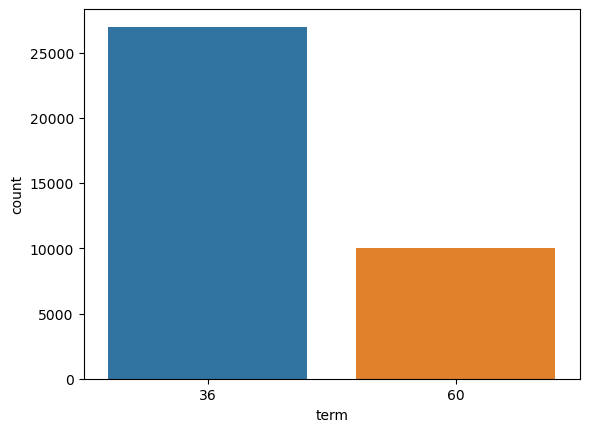

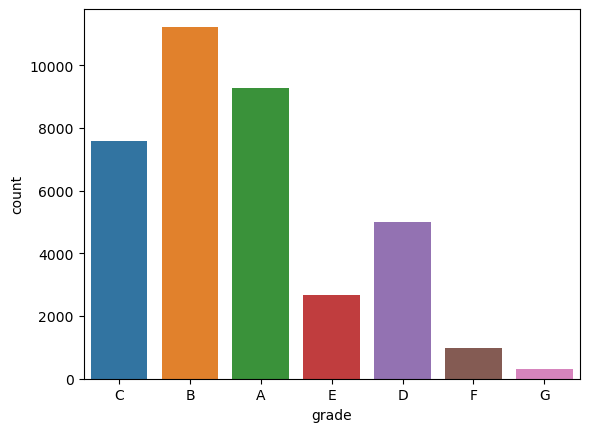

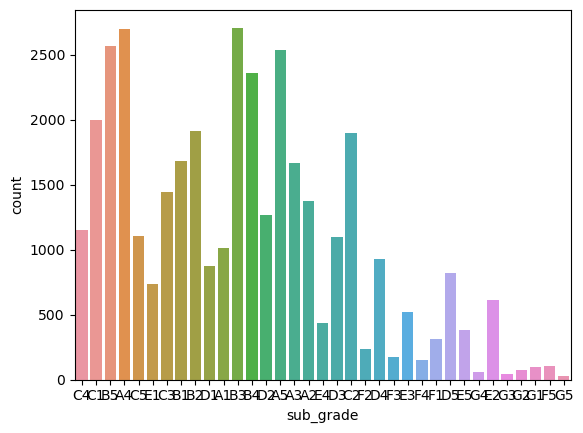

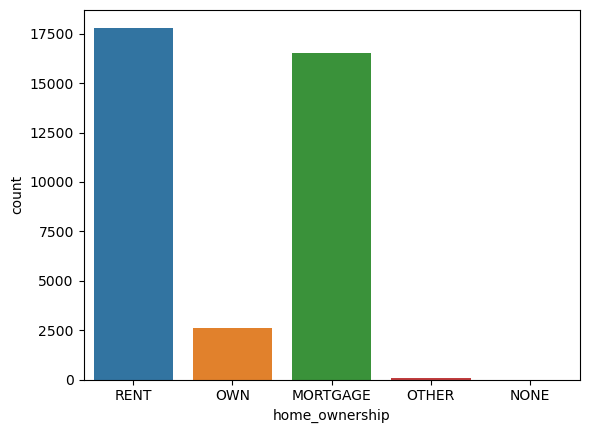

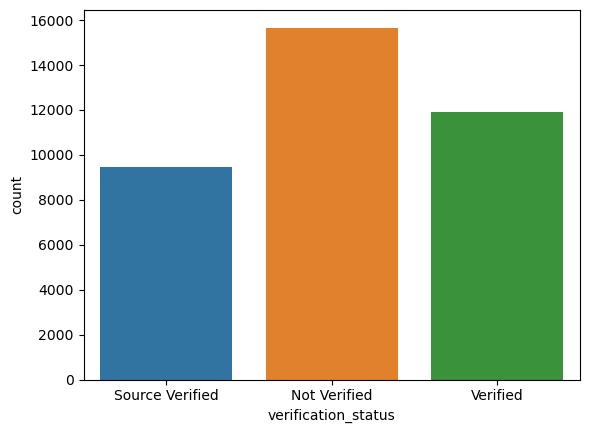

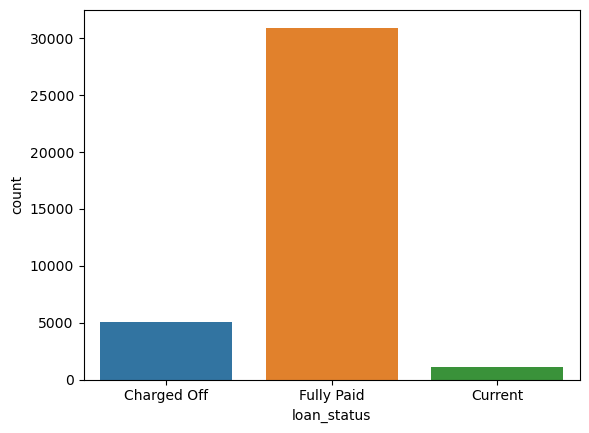

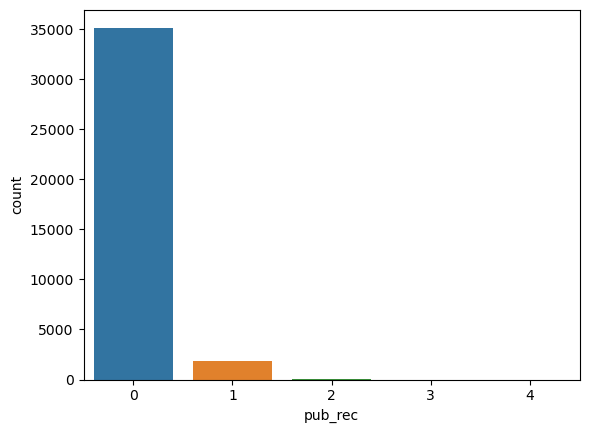

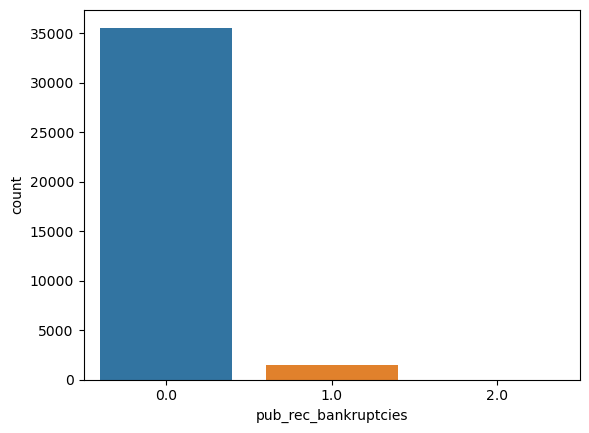

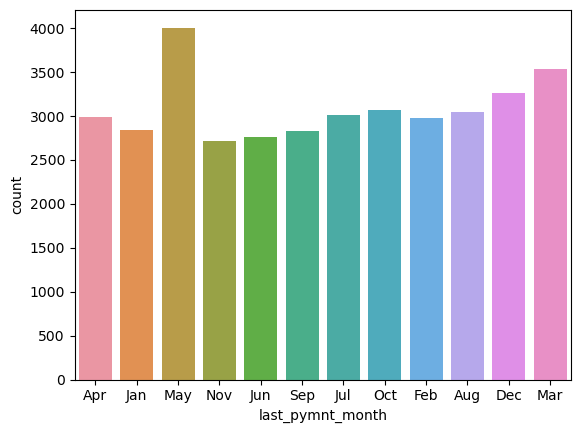

In [104]:
for i in categorical:
    sns.countplot(x=club_case_study_df[i])
    plt.show()

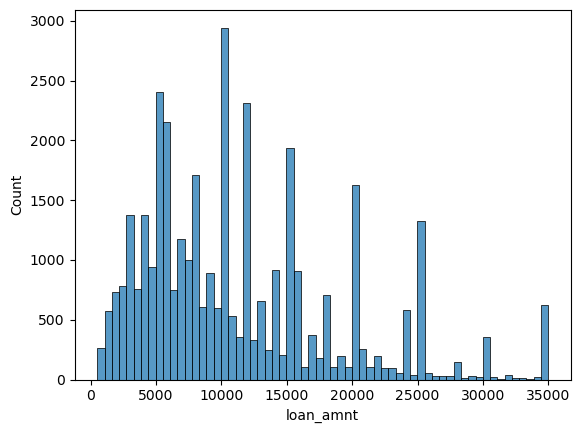

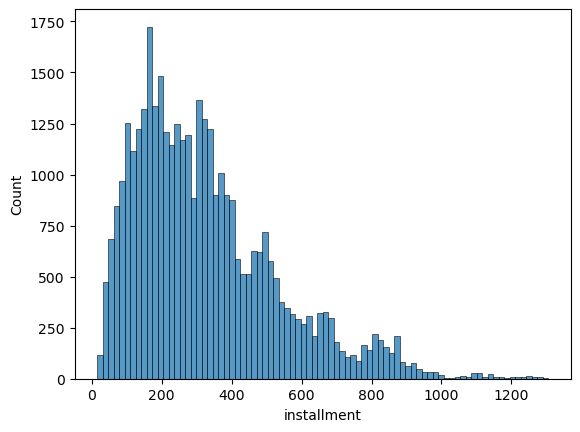

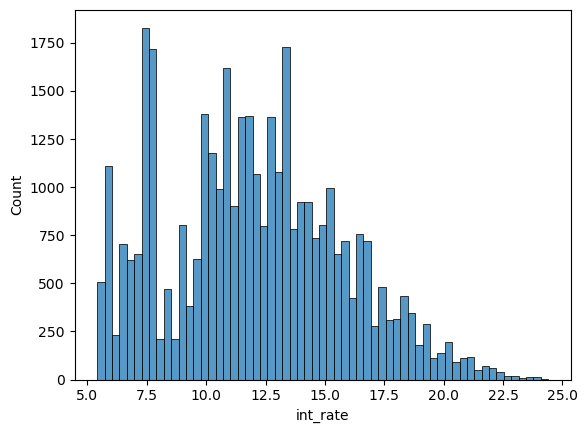

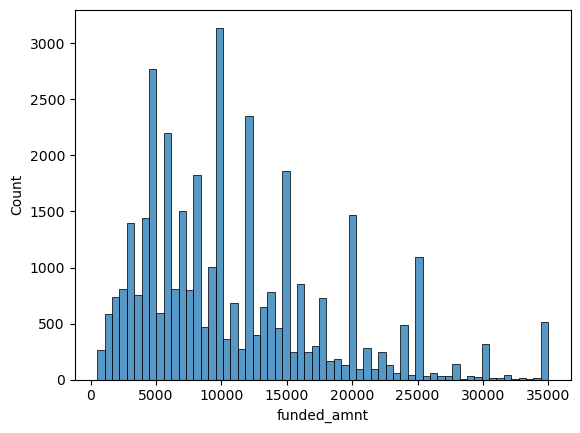

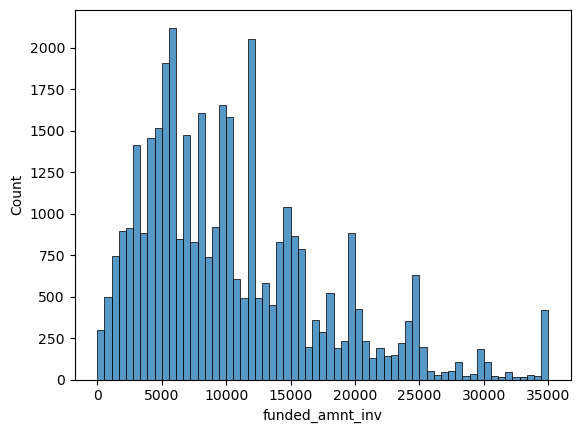

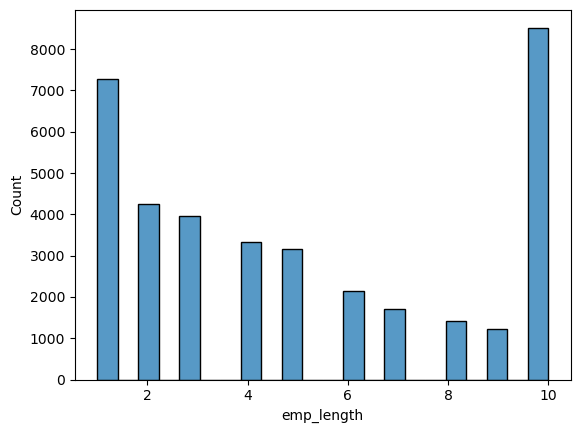

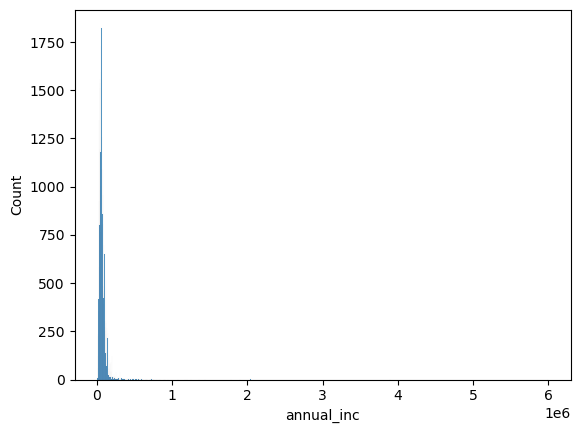

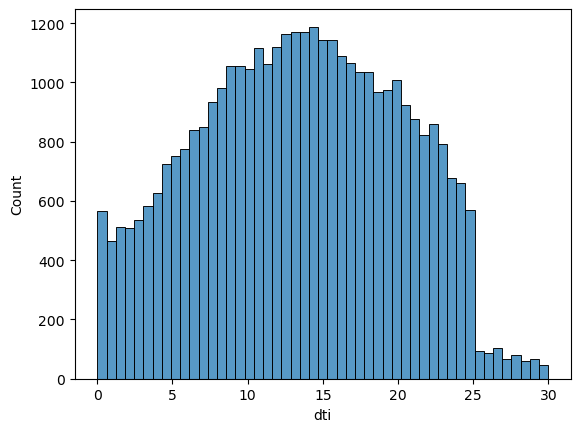

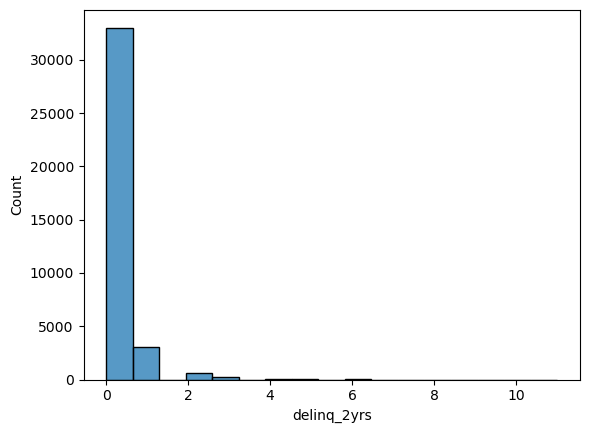

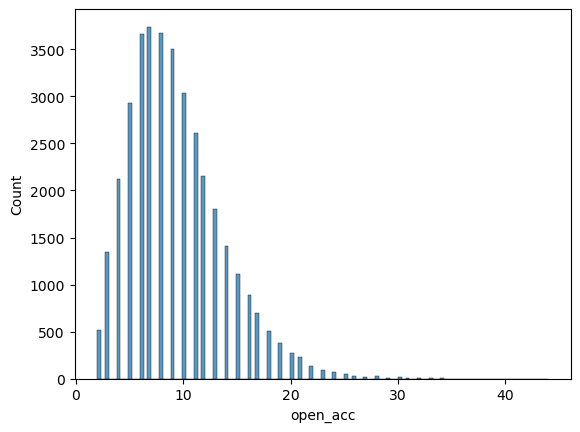

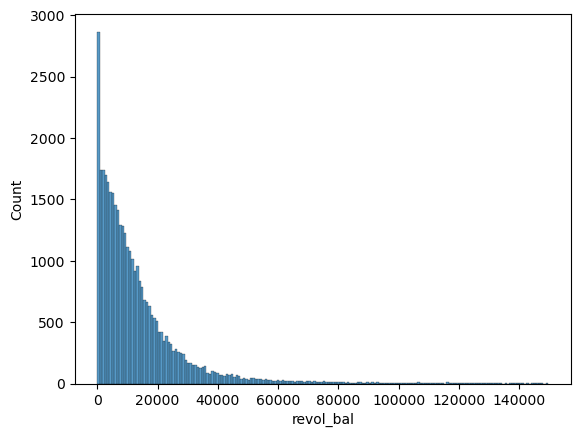

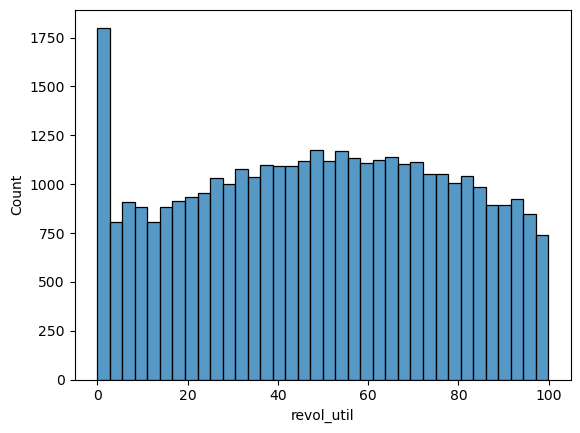

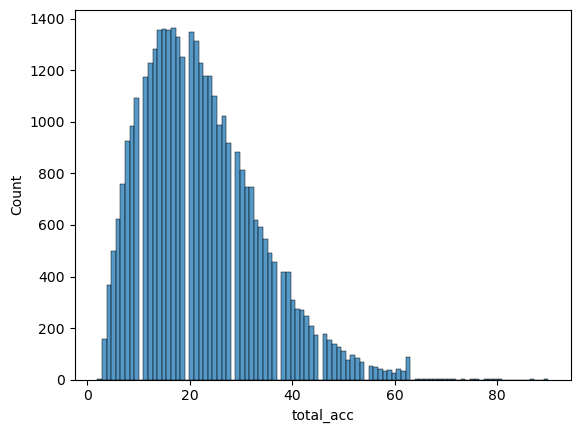

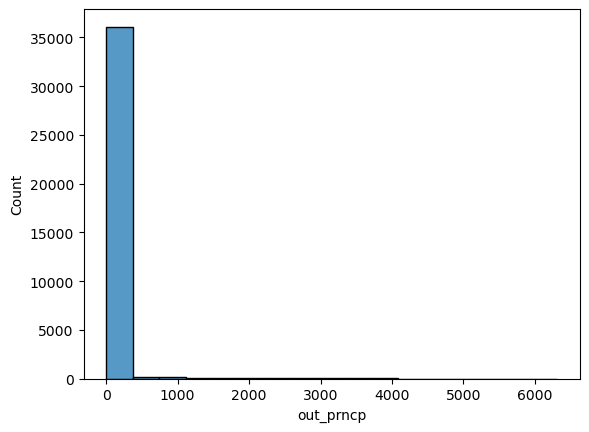

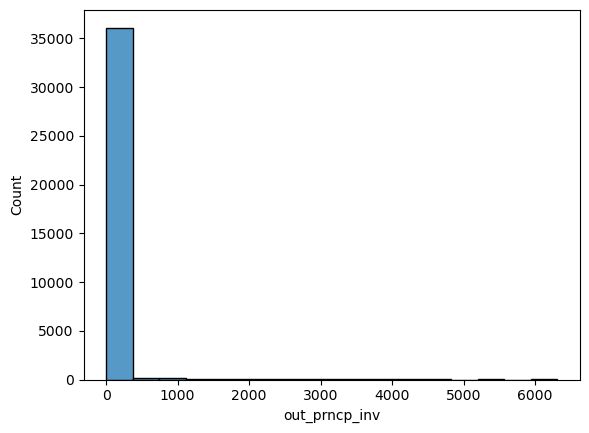

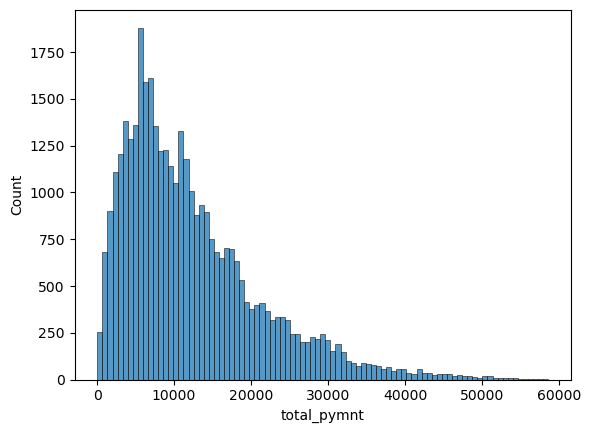

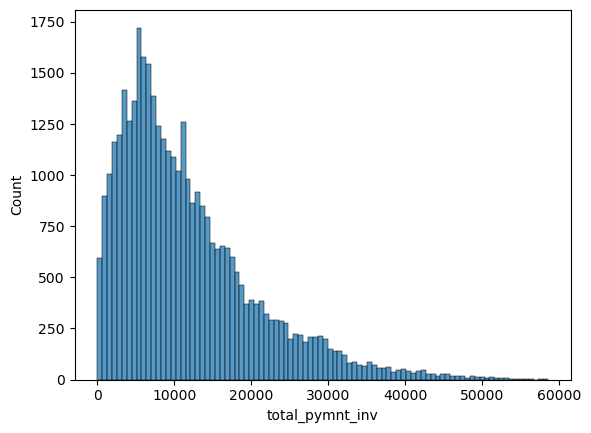

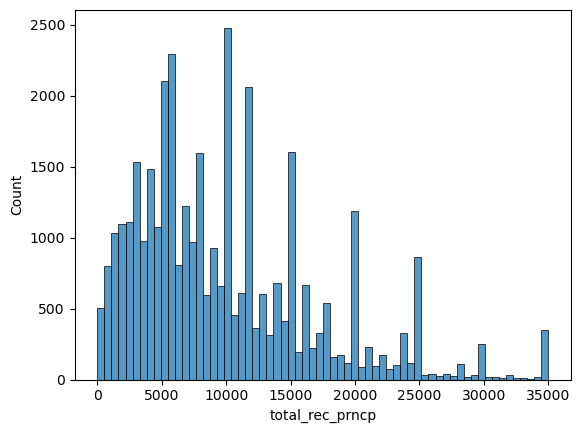

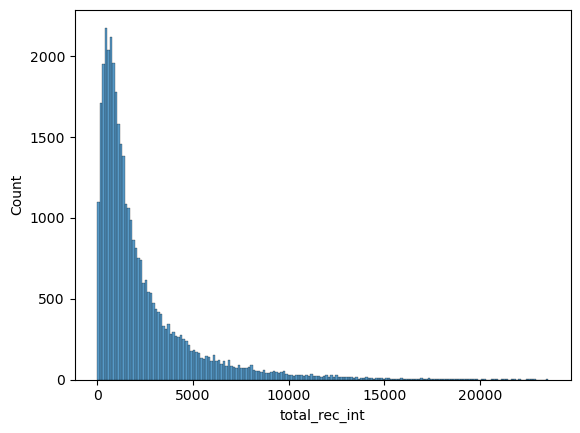

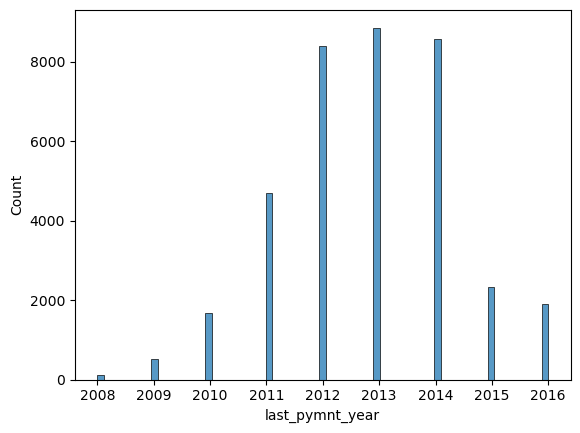

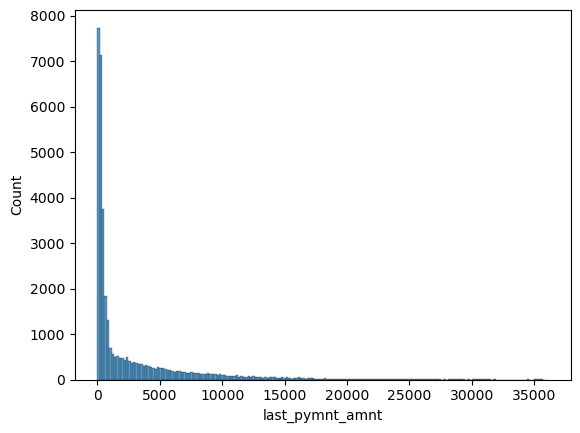

In [108]:
for i in continuous:
    sns.histplot(club_case_study_df[i])
    plt.show()

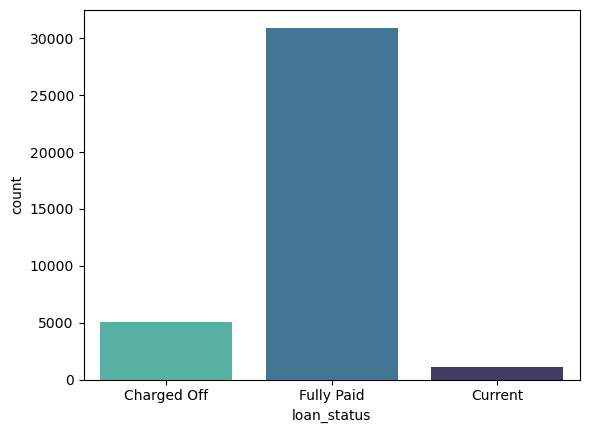

In [109]:
sns.countplot(x="loan_status", data=club_case_study_df, palette="mako_r")
plt.show()

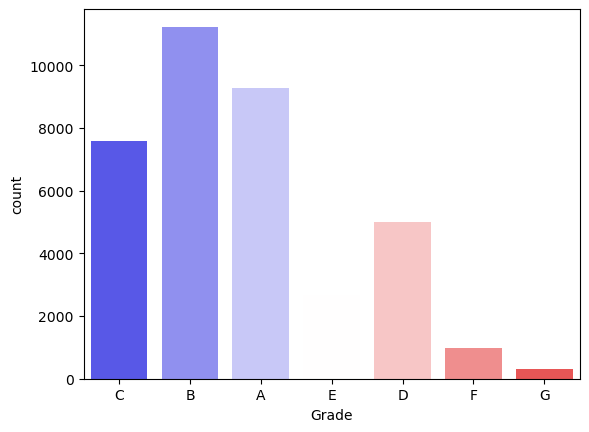

In [148]:
sns.countplot(x='grade', data=club_case_study_df, palette="bwr")
plt.xlabel("Grade")
plt.show()

Analysing distribution of loan_status and grade


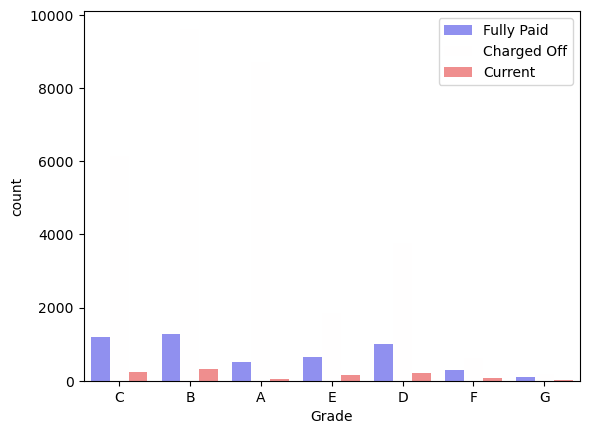

In [150]:
print('Analysing distribution of loan_status and grade')
sns.countplot(x = club_case_study_df['grade'], hue = club_case_study_df['loan_status'], palette='bwr') 
plt.legend(["Fully Paid","Charged Off","Current"])
plt.xlabel("Grade")
plt.show()

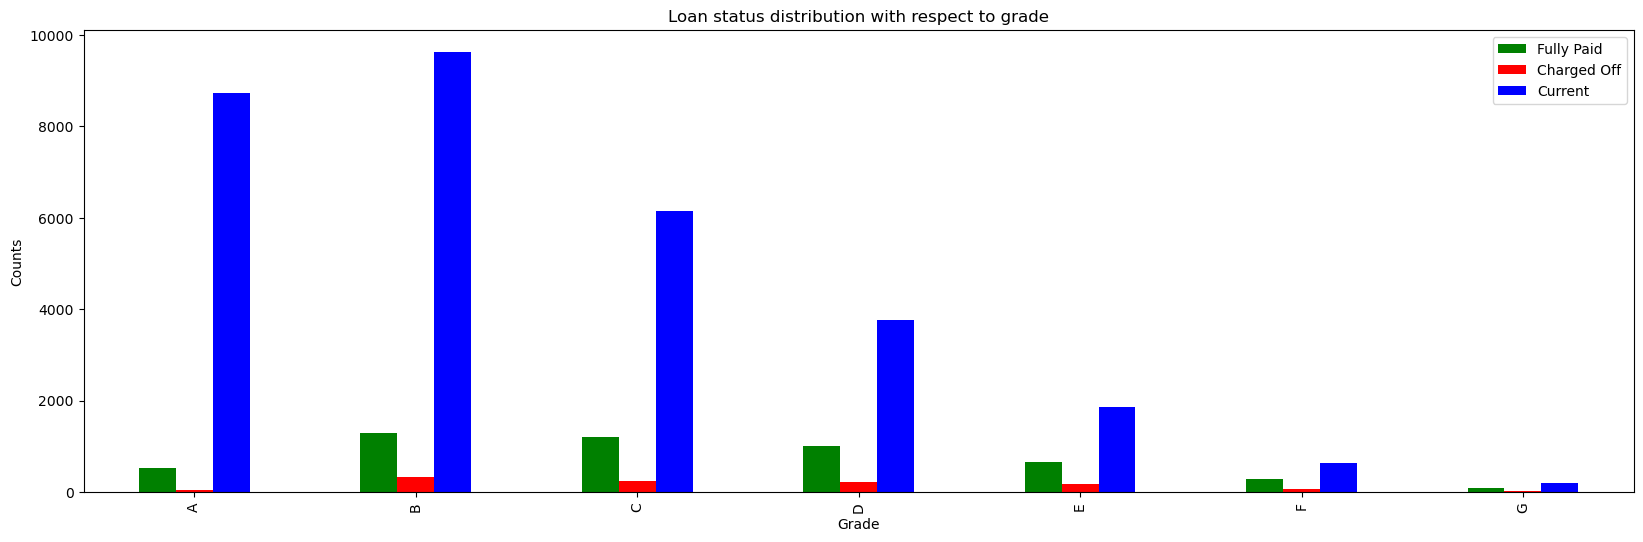

In [152]:
pd.crosstab(club_case_study_df.grade,club_case_study_df.loan_status).plot(kind="bar",figsize=(20,6), color = ['g','r','b'])
plt.title('Loan status distribution with respect to grade')
plt.legend(["Fully Paid","Charged Off","Current"])
plt.xlabel('Grade')
plt.ylabel('Counts')
plt.show()

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
outliers = []
# Outlier detection for continuous variables
for col in continuous:
    print(f"{col} :  {check_outlier(club_case_study_df, col)}")
    outliers.append(check_outlier(club_case_study_df, col))
    
print(f"Outliers detected? {np.array(outliers).any()}")

In [ ]:
outliers = []
# Outlier detection for continuous variables
for col in continuous:
    print(f"{col} :  {check_outlier(club_case_study_df, col)}")
    outliers.append(check_outlier(club_case_study_df, col))
    
print(f"Outliers detected? {np.array(outliers).any()}")

In [ ]:
#Data Correlation check
sns.set_style(style="darkgrid")
print(data.corr()['target'])
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 11}, square=True);
plt.show()